In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries
in an attempt to build a machine learning model capable of predicting whether or not 
someone has heart disease based on their medical mattributes

We're going to take the following approach:
1. Problem definition.
2. Data
3. Evaluationkjh
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement:
> Given clinical parameters about a patient can we predict whether or not 
they have heart disease ?

## 2. Data

The original data came from Cleaveland Database from the UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle,
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 90 % accuracy at predicting whether or not a patient has heart disease 
during the proof of concept, we will pursue the project.

## 4. Features

This is where you will get the information about each of the features in the dataset.

**Create Data Dictionary**

* age : Age of the patient in years
* sex : 1 = Male, 0 = Female 
* cp (chest pain type) : 0 - typical angina(related to decrease in blood supply to the heart),
                         1 - atypical angina(not related to heart),
                         2 - non-anginal(typically esophagael spasms, non heart related)
                         3 - asymptomatic(not showing signs of disease)
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) - [normal, stt abnormality, lv hypertrophy]
* thalach - maximum heart rate achieved
* exang - exercise-induced angina (True/ False)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by fluoroscopy
* thal - [normal; fixed defect; reversible defect]
* num - the predicted attribute

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [74]:
# Import all the tools we will need 
import warnings
warnings.filterwarnings('ignore')

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Skikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [75]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

We have 303 rows and 14 columns.

## Data Exploration

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# How many classes are there on the target column
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

We have a balanced classicification problem, as the numbers are almost the same.

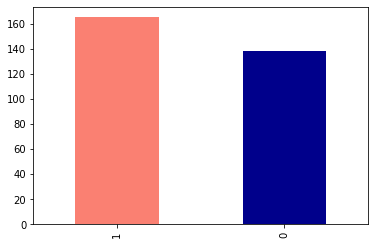

In [6]:
df.target.value_counts().plot(kind = 'bar', color = ['salmon', 'darkblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Observation:
* The dataset has more men than women, 
* The likelihood of women having heart disease is more at 75 % as opposed to men at 45 %.
* On average there is a ~ 60% chance that any random patient can be diagnosed with heart disease.

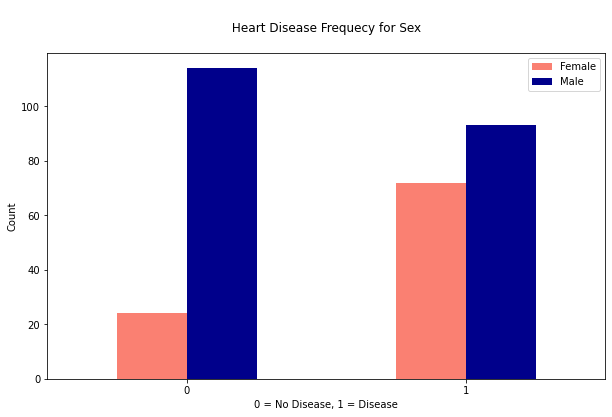

In [12]:
# cross tab of plot 
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color = ['salmon', 'darkblue'])
plt.title('\n Heart Disease Frequecy for Sex \n')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

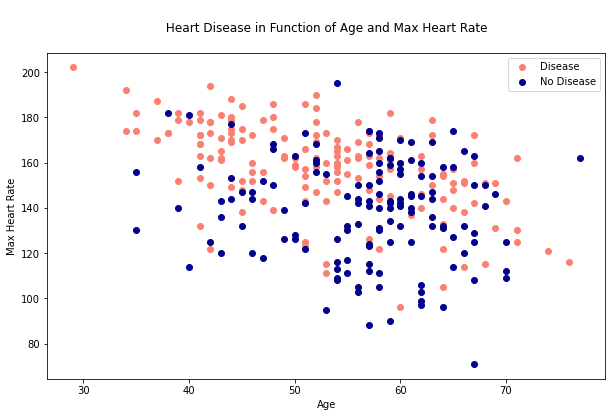

In [13]:
# Create a figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='darkblue')
# Add some info
plt.title('\n Heart Disease in Function of Age and Max Heart Rate \n')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

Observation:
* As someone gets older their maximum heart rate decreases.

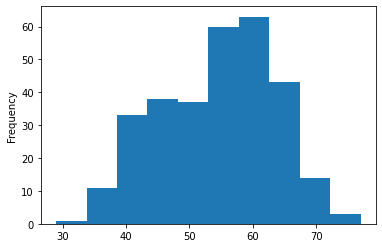

In [14]:
# Check distribution of age column
df.age.plot.hist();

Observation:
* In this normal distribution curve, the age distribution is right skewed, as most of the age range are from mid 50s then wards.

### Heart Disease Frequency by Chest Pain Type

cp (chest pain type): 
* 0 - typical angina(related to decrease in blood supply to the heart),
* 1 - atypical angina(not related to heart),
* 2 - non-anginal(typically esophagael spasms, non heart related)
* 3 - asymptomatic(not showing signs of disease)

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


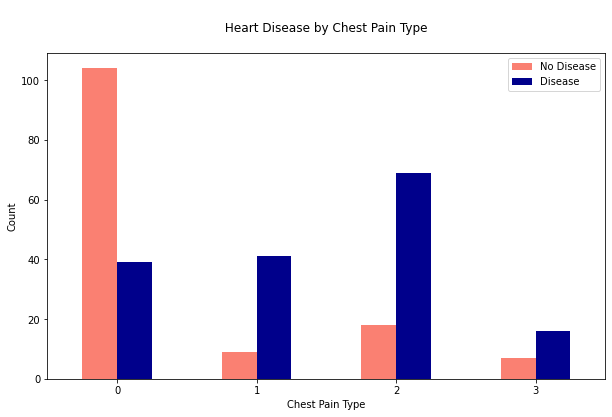

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                               figsize=(10, 6), 
                               color=['salmon','darkblue'])
# Add communication
plt.title('\n Heart Disease by Chest Pain Type \n')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

As cp increase the target value also increase.

### Buliding a Correlation Matrix

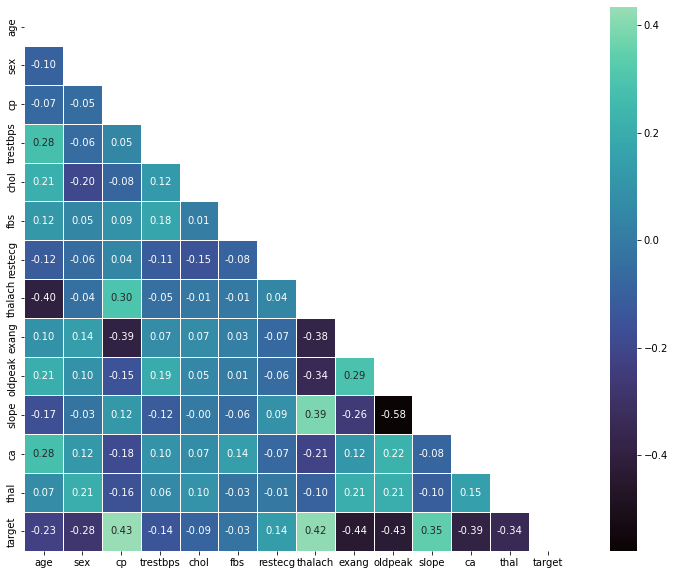

In [17]:
# Visualize correlation matrix
corr_f = df.corr()
matrix = np.triu(corr_f)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_f,
            mask = matrix,
            center=0,
            annot=True,
            linewidth=0.6,
            fmt='.2f',
            square=True,
            cmap='mako');

Obsrvation:
* If someone get chest pain during exercise(exang=1), their chance of having heart disease goes down(exang=0)

### Modelling

In [18]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# A look at X
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
# A look at y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:

np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [22]:
# Look at X train
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
# Look at y train
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Chosing the Model

Three models we are going to try out:
* Logistic Regression
* Decision Tree Regressor
* Random Forest Classifier

In [24]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different classification sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''
    # set random seed
    np.random.seed(42)    
    # make a dict to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

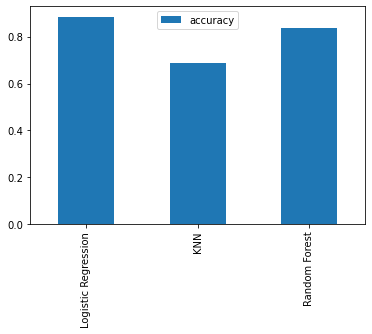

In [26]:
# Visualize
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

 From baseline models
 Look at the ff:
 * Hyperparameter tuning
 * Feature importance
 * Confusion matrix
 * Cross validation
 * Precision
 * Recall
 * F1 score
 * Classification report
 * ROC curve
 * Area under the curve (ROC)

### Hyperparameter tuning 

In [27]:
# Tune KNN

train_scores = []
test_scores = []

# Create a list of diff values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through diff n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit algorithm
    knn.fit(X_train, y_train)
    
    # update train scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update test scores list
    test_scores.append(knn.score(X_test,y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test data: 75.41%


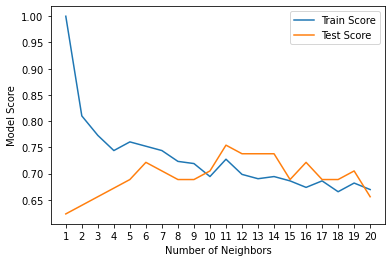

In [30]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f'Max KNN score on test data: {max(test_scores)*100:.2f}%')

KNN score after tuning at 75% is still lower than the other two models. Discard it for now.

### Hyperparameter Tuning with RandomisedSearchCV

Cross validate:
* LogisticRegression()
* RandomForestClassifier()

In [31]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)
          }

In [32]:
# Tune LogisticRegression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
# Find best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
#Evaluate score on test data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuned score the same as the first untuned score 

In [35]:
# Set up random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparamenter model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Find best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [38]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

Score went up a little from 84 % to 87%

Logistic Regression model is still out performing RandomForestClassifier even when tuned.

### Improving Logistic Regression model using GridSearchCV

In [39]:
# Diff hyperparams for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']
               }

# Set up grid hyperparam search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparam search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Evaluate grid search Logistic Regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

The results are still the same.

### Evaluate our tuned classifier beyond accuracy

In [43]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

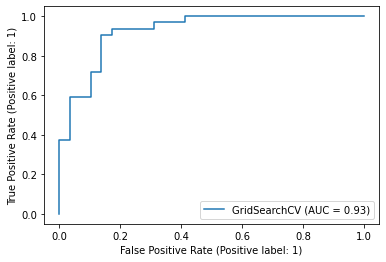

In [46]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [47]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [48]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



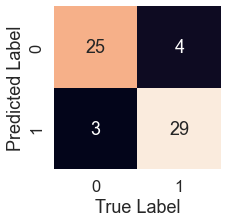

In [49]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix diagram usinf seaborn's heatmap
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test,y_preds)

### Calculating evalution metrics using cross validation.

Calculations will be on the accuracy, f1 score, precision and recall

In [50]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Create new classifiers with best params
clf = LogisticRegression(C=0.20433597178569418,
                        solver= 'liblinear')

In [52]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [54]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [55]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [56]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [57]:
# Cross validated f1_score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

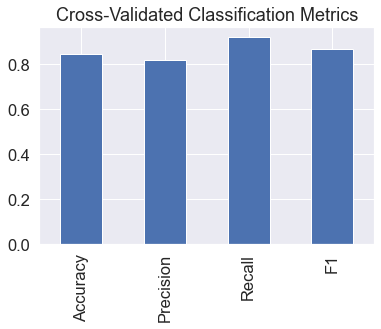

In [58]:
# Visualize our cross validated matrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                     legend=False);

### Feature Importance 

In [59]:
# Best Parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(X_train, y_train);

In [61]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [62]:
# Match coef's of features to columns
feature_dict =dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

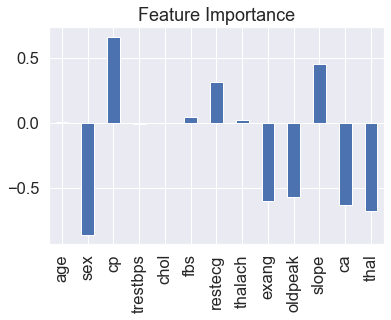

In [63]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [64]:
# Use cross tab 
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


### 6. Experimentation

Have not reached the 95% evaluation metrics, only went til 89%. Possible future steps: 
* Collect more data as this dataset only has 303 patient records
* Try a better model e.g CatBoost or XGBoost
* Improve current models beyond what has been done so far.
If model is good enough, export and share.

In [68]:
# Test Model
input_data = (63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1)
# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape array as we predict one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Person does not have heart disease')
else:
    print('Person has heart problems')

[1]
Person has heart problems


In [69]:
import pickle

In [70]:
# saving gs_log_reg(grid search logistic regression) clf(classifier) model
filename = 'heart_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [71]:
# loading saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [72]:
# print columns present in dataset
for column in  X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
